In [2]:
import numpy as np
import cv2
import glob
import os
import json

In [ ]:
def filter_label_map(outputs, label_map):
    """将81类标签聚合成我们的9类标签"""
    file_path = "tools/data/ava/my_label.txt"
    lines = open(file_path).readlines()
    # 用来存储整合后的数据
    res = np.zeros((len(lines)+1))
    lines = [x.strip().split(": ") for x in lines]
    label_map = {}
    for i, label in enumerate(lines):
        label_map[i] =  label[1]
        inds = [int(j) for j in label[0].split("*")]
        for j in inds:
            res[i] += outputs[j]
            outputs[j] = 0
    i += 1
    label_map[i] = 'others'
    res[i] = sum(outputs)
    return res, label_map

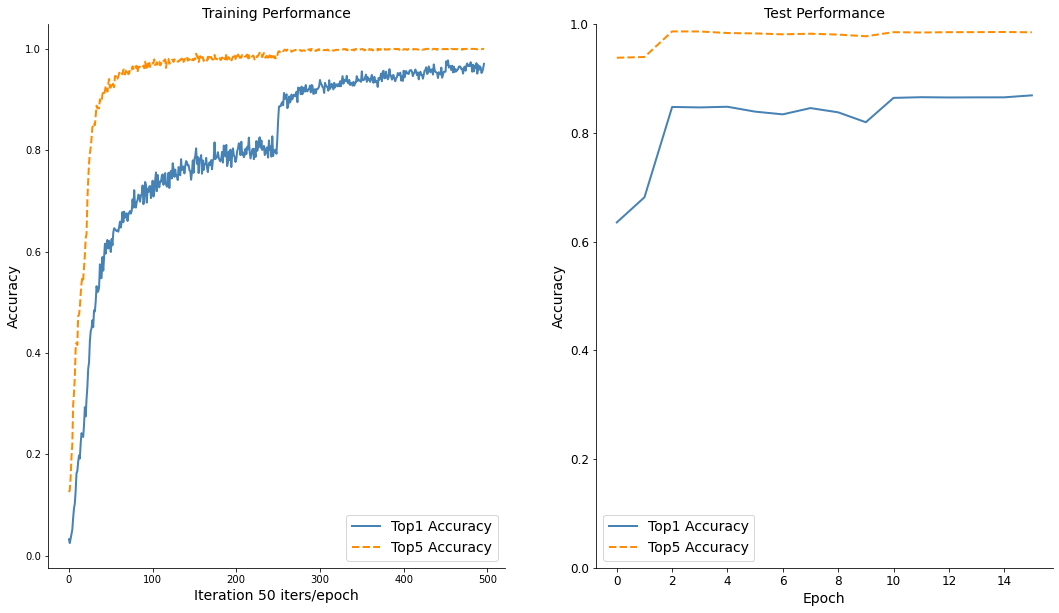

In [33]:
# 读取数据画图
log_file_path = "log/stgcn/stgcn_80e_ntu60_xsub_keypoint.json"
data_file_path = "log/stgcn/stgcn_80e_ntu60_xsub_keypoint.log.txt"

import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.font_manager import FontProperties

# 读取JSON行格式文件
with open(log_file_path, 'r') as f:
    lines = f.readlines()


# 解析每行JSON数据并提取需要的字段
title = lines[0]
lines = lines[1:]
train_top1_acc = []
train_top5_acc = []
train_loss = []
val_top1_acc = []
val_top5_acc = []
val_loss = []

for i, line in enumerate(lines):
    data = json.loads(line)
    mode = data["mode"]
    if mode == 'train':
        if i>=500:
            continue
        train_top1_acc.append(data['top1_acc'])
        train_top5_acc.append(data["top5_acc"])
        train_loss.append(data["loss"])
    else:
        val_top1_acc.append(data['top1_acc'])
        val_top5_acc.append(data["top5_acc"])
        val_loss.append(data["loss"])

# 设置图表字体
font = FontProperties(size=14)

# 绘制折线图
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 10))

ax1.plot(train_top1_acc, label='Top1 Accuracy', color='steelblue', linewidth=2)
ax1.plot(train_top5_acc, label='Top5 Accuracy', color='darkorange', linewidth=2, linestyle='--')
ax1.legend(prop=font)
ax1.set_xlabel('Iteration 50 iters/epoch', fontproperties=font)
ax1.set_ylabel('Accuracy', fontproperties=font)
ax1.set_title('Training Performance', fontproperties=font)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.plot(val_top1_acc, label='Top1 Accuracy', color='steelblue', linewidth=2)
ax2.plot(val_top5_acc, label='Top5 Accuracy', color='darkorange', linewidth=2, linestyle='--')
ax2.legend(prop=font)
ax2.set_xlabel('Epoch', fontproperties=font)
ax2.set_ylabel('Accuracy', fontproperties=font)
ax2.set_title('Test Performance', fontproperties=font)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0, 1)
plt.show()



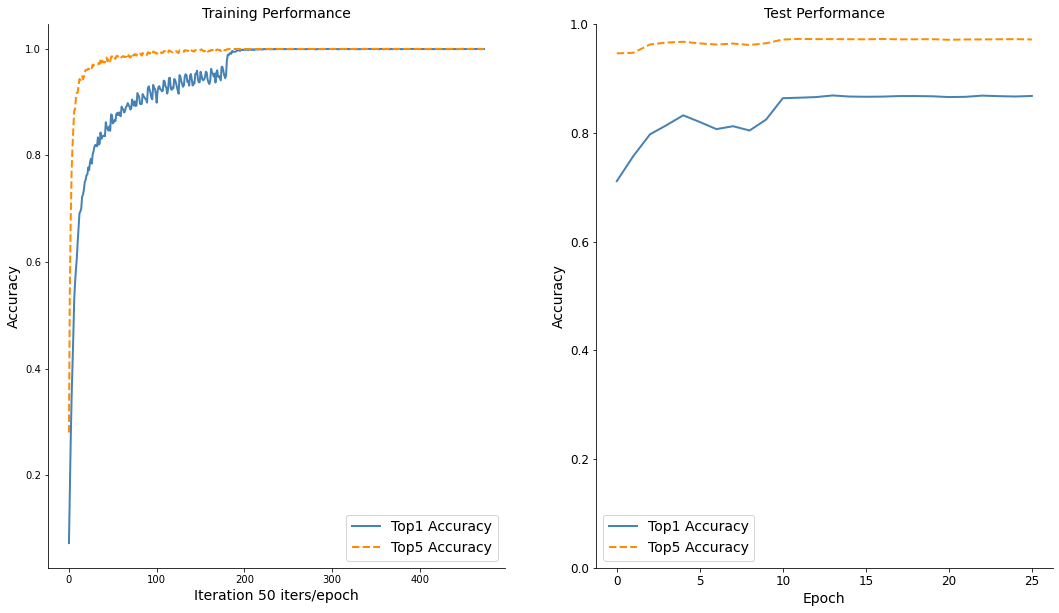

In [39]:
# 读取数据画图
log_file_path = 'log/asgcn/2sagcn_80e_ntu60_xsub_bone_3d.json'
# data_file_path = "log/stgcn/stgcn_80e_ntu60_xsub_keypoint.log.txt"

import json
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.font_manager import FontProperties

# 读取JSON行格式文件
with open(log_file_path, 'r') as f:
    lines = f.readlines()


# 解析每行JSON数据并提取需要的字段
title = lines[0]
lines = lines[1:]
train_top1_acc = []
train_top5_acc = []
train_loss = []
val_top1_acc = []
val_top5_acc = []
val_loss = []

for i, line in enumerate(lines):
    data = json.loads(line)
    mode = data["mode"]
    if mode == 'train':
        if i>=500:
            continue
        train_top1_acc.append(data['top1_acc'])
        train_top5_acc.append(data["top5_acc"])
        train_loss.append(data["loss"])
    else:
        val_top1_acc.append(data['top1_acc'])
        val_top5_acc.append(data["top5_acc"])
        # val_loss.append(data["loss"])

# 设置图表字体
font = FontProperties(size=14)

# 绘制折线图
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18, 10))

ax1.plot(train_top1_acc, label='Top1 Accuracy', color='steelblue', linewidth=2)
ax1.plot(train_top5_acc, label='Top5 Accuracy', color='darkorange', linewidth=2, linestyle='--')
ax1.legend(prop=font)
ax1.set_xlabel('Iteration 50 iters/epoch', fontproperties=font)
ax1.set_ylabel('Accuracy', fontproperties=font)
ax1.set_title('Training Performance', fontproperties=font)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2.plot(val_top1_acc, label='Top1 Accuracy', color='steelblue', linewidth=2)
ax2.plot(val_top5_acc, label='Top5 Accuracy', color='darkorange', linewidth=2, linestyle='--')
ax2.legend(prop=font)
ax2.set_xlabel('Epoch', fontproperties=font)
ax2.set_ylabel('Accuracy', fontproperties=font)
ax2.set_title('Test Performance', fontproperties=font)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.ylim(0, 1)
plt.show()



In [37]:
data

{'mode': 'val',
 'epoch': 3,
 'iter': 258,
 'lr': 0.1,
 'top1_acc': 0.70213,
 'top5_acc': 0.93213}